<a href="https://colab.research.google.com/github/ylmgrbzz/Hitters-Data-Analysis-With-KNN-ANN-CART-RANDOM-FORESTS-GBM-XGBOOST-CATBOOST/blob/main/Hitters_Data_Analysis_With_KNN_ANN_CART_RANDOM_FORESTS_GBM_XGBOOST_CATBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR





In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])


In [ ]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [ ]:
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [ ]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)


In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
knn_model.n_neighbors


5

In [ ]:
knn_model.metric


'minkowski'

In [ ]:
dir(knn_model)


In [ ]:
knn_model.predict(X_test)[0:5]


array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


426.6570764525201

In [ ]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k , " için RMSE değeri ",rmse)
    

k= 1  için RMSE değeri  455.03925390751965
k= 2  için RMSE değeri  415.99629571490965
k= 3  için RMSE değeri  420.6765370082348
k= 4  için RMSE değeri  428.8564674588792
k= 5  için RMSE değeri  426.6570764525201
k= 6  için RMSE değeri  423.5071669008732
k= 7  için RMSE değeri  414.9361222421057
k= 8  için RMSE değeri  413.7094731463598
k= 9  için RMSE değeri  417.84419990871265
k= 10  için RMSE değeri  421.6252180741266


In [ ]:
knn_params = {"n_neighbors": np.arange(1,30,1)}


In [ ]:
knn = KNeighborsRegressor()


In [ ]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)


In [ ]:
knn_cv_model.best_params_


{'n_neighbors': 8}

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)


In [ ]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

In [ ]:
scaler = StandardScaler() 

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)


In [ ]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp_model


MLPRegressor()

In [ ]:
mlp_model.predict(X_test_scaled)[0:5]


array([20.49221345, 38.55140616, 71.20998944, 11.1555374 , 22.57701039])

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


658.412425342569

In [ ]:
mlp_params = {"alpha" : [0.1,0.01,0.02,0.001,0.0001],
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose = 2,n_jobs =-1).fit(X_train,y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp_cv_model.best_params_


{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [ ]:
mlp_tuned = MLPRegressor(alpha=0.1,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_pred=mlp_tuned.predict(X_test_scaled)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


362.76019251092583

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)


In [ ]:
cart_model.fit(X_train,y_train)


DecisionTreeRegressor(max_leaf_nodes=3)

In [ ]:
cart_model.predict(X_test)[0:5]


array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [ ]:
y_pred = cart_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


460.0663148428844

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)


In [ ]:
y_pred = cart_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


449.25440345239093

In [ ]:
cart_model

DecisionTreeRegressor()

In [ ]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

391.5530522634766

In [ ]:
cart_params = {"max_depth":[1,3,4,5,10,20],"min_samples_split":[2,10,5,30,50,100]}


In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)


In [ ]:
cart_cv_model.best_params_


{'max_depth': 4, 'min_samples_split': 50}

In [ ]:
cart_tuned = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)


In [ ]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

In [ ]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)


In [ ]:
rf_model


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


344.8191624908484

In [ ]:
rf_params = {"max_depth": [5,8],
            "max_features": [2,5],
            "n_estimators":[200,500,1000],
            "min_samples_split":[2,10,80]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
rf_cv_model.best_params_


{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_model = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned=rf_model.fit(X_train,y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


349.1649379391149

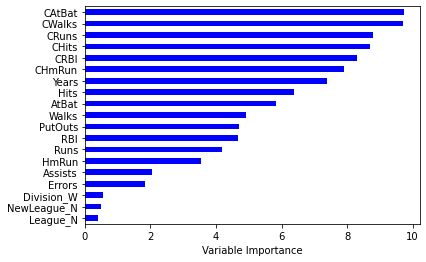

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                      axis=0,
                      ascending = True).plot(kind = 'barh',
                                           color = 'b',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)


In [ ]:
gbm_model

GradientBoostingRegressor()

In [ ]:
y_pred = gbm_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


342.4826294124384

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)


In [ ]:
gbm_params = {"learning_rate":[0.1,0.01],
             "max_depth":[3,5],
             "n_estimators":[200,500],
             "subsample":[1,0.5,0.8]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,
                            n_jobs=1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1,

In [ ]:
gbm_cv_model.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate =0.1,
                                     max_depth = 3,
                                     n_estimators=200,
                                     subsample=0.8,
                                     loss="lad").fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


In [ ]:
y_pred = gbm_tuned.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


342.5441508604146

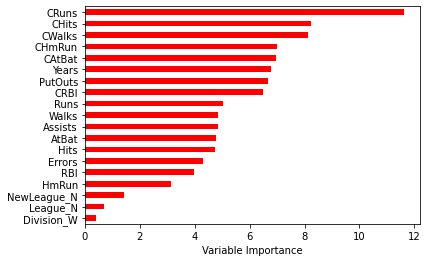

In [ ]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                      axis=0,
                      ascending = True).plot(kind = 'barh',
                                           color = 'r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None

In [ ]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor().fit(X_train,y_train)


[14:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb

XGBRegressor()

In [ ]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

359.91750599447033

In [ ]:
xgb_params = {"learning_rate": [0.1,0.01,0.5] ,
             "max_depth":[2,3,4,5,8],
             "n_estimators":[100,200,500],
             "colsample_bylevel":[0.4,0.7]}


In [ ]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs =-1,verbose =2).fit(X_train,y_train)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
[14:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_cv_model.best_params_


{'colsample_bylevel': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [ ]:
xgb_tuned = XGBRegressor(colsample_bylevel=0.7,
                        learning_rate=0.1,
                        max_depth=2,
                        n_estimators=500).fit(X_train,y_train)

[14:55:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

333.4542345754869

In [ ]:
!pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor


In [ ]:
lgb_model = LGBMRegressor().fit(X_train,y_train)


In [ ]:
lgb_model

LGBMRegressor()

In [ ]:
y_pred = lgb_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


363.8712087611089

In [ ]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
              "n_estimators":[40,100,1000],
              "max_depth":[1,2,3]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgb_model,lgbm_params,cv = 10,n_jobs =-1,
                            verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
lgbm_cv_model.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

In [ ]:
lgb_tuned = LGBMRegressor(learning_rate=0.1,
                         max_depth=3,
                         n_estimators=40).fit(X_train,y_train)

In [ ]:
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

364.7698635536198

In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.5 MB/s 


In [ ]:
from catboost import CatBoostRegressor


In [ ]:
catb_model = CatBoostRegressor().fit(X_train,y_train)


Learning rate set to 0.031674
0:	learn: 437.6430699	total: 48.4ms	remaining: 48.4s
1:	learn: 431.3923642	total: 50.7ms	remaining: 25.3s
2:	learn: 424.8820360	total: 52.9ms	remaining: 17.6s
3:	learn: 418.2514904	total: 55.2ms	remaining: 13.7s
4:	learn: 412.6394021	total: 58.7ms	remaining: 11.7s
5:	learn: 406.6247020	total: 60.7ms	remaining: 10.1s
6:	learn: 400.5321206	total: 62.9ms	remaining: 8.93s
7:	learn: 394.6683437	total: 65.2ms	remaining: 8.08s
8:	learn: 388.2496484	total: 67.4ms	remaining: 7.42s
9:	learn: 382.9448842	total: 69.7ms	remaining: 6.9s
10:	learn: 377.2600080	total: 71.9ms	remaining: 6.47s
11:	learn: 372.4829606	total: 74.2ms	remaining: 6.11s
12:	learn: 366.6823437	total: 76.4ms	remaining: 5.8s
13:	learn: 362.6076230	total: 78.6ms	remaining: 5.53s
14:	learn: 358.0107745	total: 80.8ms	remaining: 5.31s
15:	learn: 353.2802665	total: 83ms	remaining: 5.11s
16:	learn: 348.5646265	total: 85.2ms	remaining: 4.93s
17:	learn: 343.6407912	total: 87.6ms	remaining: 4.78s
18:	learn: 3

In [ ]:
y_pred = catb_model.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [ ]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [ ]:
catb_model = CatBoostRegressor()


In [ ]:
catb_cv_model = GridSearchCV(catb_model,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 1.06ms	remaining: 211ms
1:	learn: 404.8723520	total: 2.47ms	remaining: 245ms
2:	learn: 387.4057666	total: 3.42ms	remaining: 225ms
3:	learn: 372.2801584	total: 4.35ms	remaining: 213ms
4:	learn: 358.9204229	total: 5.27ms	remaining: 206ms
5:	learn: 347.0083933	total: 6.18ms	remaining: 200ms
6:	learn: 336.0130818	total: 7.1ms	remaining: 196ms
7:	learn: 324.3923300	total: 8.04ms	remaining: 193ms
8:	learn: 314.8690957	total: 8.97ms	remaining: 190ms
9:	learn: 308.5075563	total: 9.9ms	remaining: 188ms
10:	learn: 298.8587285	total: 10.8ms	remaining: 185ms
11:	learn: 294.7655438	total: 11.7ms	remaining: 183ms
12:	learn: 288.0697862	total: 12.5ms	remaining: 180ms
13:	learn: 282.6697154	total: 13.4ms	remaining: 178ms
14:	learn: 277.6121667	total: 14.3ms	remaining: 176ms
15:	learn: 273.4383979	total: 15.2ms	remaining: 175ms
16:	learn: 269.1556201	total: 16ms	remaining: 173ms
17:	learn: 264.8098704	total: 16.9m

In [ ]:
catb_cv_model.best_params_


{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
catb_tuned = CatBoostRegressor(depth=3,
                              iterations=200,
                              learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 2.35ms	remaining: 468ms
1:	learn: 404.8723520	total: 3.59ms	remaining: 355ms
2:	learn: 387.4057666	total: 4.73ms	remaining: 311ms
3:	learn: 372.2801584	total: 5.73ms	remaining: 281ms
4:	learn: 358.9204229	total: 6.68ms	remaining: 261ms
5:	learn: 347.0083933	total: 7.57ms	remaining: 245ms
6:	learn: 336.0130818	total: 8.46ms	remaining: 233ms
7:	learn: 324.3923300	total: 9.34ms	remaining: 224ms
8:	learn: 314.8690957	total: 10.2ms	remaining: 217ms
9:	learn: 308.5075563	total: 11.1ms	remaining: 212ms
10:	learn: 298.8587285	total: 12ms	remaining: 207ms
11:	learn: 294.7655438	total: 12.9ms	remaining: 202ms
12:	learn: 288.0697862	total: 13.8ms	remaining: 198ms
13:	learn: 282.6697154	total: 14.7ms	remaining: 195ms
14:	learn: 277.6121667	total: 15.6ms	remaining: 192ms
15:	learn: 273.4383979	total: 16.5ms	remaining: 189ms
16:	learn: 269.1556201	total: 17.4ms	remaining: 187ms
17:	learn: 264.8098704	total: 18.2ms	remaining: 184ms
18:	learn: 261.6700768	total: 19.1ms	rem

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482

In [ ]:
def compML(df, y, alg):
    y = df[y]
    X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi = alg.__name__
    print(model_ismi,'Modeli Test Hatası:', RMSE)
    return RMSE

In [ ]:
compML(df,"Salary",SVR)


SVR Modeli Test Hatası: 460.0032657244849


460.0032657244849

In [ ]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [ ]:
for i in models:
    compML(df,"Salary",i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[15:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 355.3069284672173
RandomForestRegressor Modeli Test Hatası: 344.6857264969629
DecisionTreeRegressor Modeli Test Hatası: 443.27798490354957
MLPRegressor Modeli Test Hatası: 429.4027118474128
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849
